# ERA - Interim Forecast

## Configuration

In [1]:
INPUT_FILE_AN = 'csvs/database_interim.csv'
INPUT_FILE_FC = 'csvs/database_interim_forecast.csv'
HOPT_ELM_EXP = 'interim_elm_1l_cv'
HOPT_SVM_EXP = 'interim_svm_cv'

In [2]:
from lib.helpers import *
from lib.plots import *
from IPython.display import set_matplotlib_formats
from IPython.core.display import clear_output

%matplotlib inline
%load_ext autoreload
%autoreload 2
set_matplotlib_formats('retina', 'png', 'pdf')

## Read data

### Analysis

In [3]:
import pandas as pd

an = pd.read_csv(INPUT_FILE_AN, na_values=['#NAME?'])

In [4]:
len(an)

22674

In [5]:
an.head(5)

,timestamp,power,850_geopotential,850_temperature,850_u_component_of_wind,850_v_component_of_wind,850_potential_vorticity,850_specific_humidity,850_vertical_velocity,850_vorticity_(relative),...,soil_temperature_level_3,low_cloud_cover,medium_cloud_cover,high_cloud_cover,skin_reservoir_content,total_column_ozone,logarithm_of_surface_roughness_length_for_heat,skin_temperature,soil_temperature_level_4,temperature_of_snow_layer
0,817102800.0,17.368866,15551.239746,278.822571,-3.061764,-0.489191,2.326271e-07,0.003270,0.073979,-0.000011,...,287.882782,0.161972,0.0,9.999779e-13,1.062396e-05,0.005594,-6.338408,278.132759,291.093918,279.080872
1,817124400.0,0.000000,15506.351440,278.655956,-1.135327,-0.203951,2.958344e-07,0.003151,0.009349,-0.000019,...,287.755463,0.000000,0.0,2.318631e-01,1.441880e-06,0.005579,-6.338408,288.425827,291.072754,282.956604
2,817146000.0,0.000000,15337.826416,278.584427,2.881071,-0.913684,4.412832e-07,0.003208,0.007616,-0.000022,...,287.671432,0.000000,0.0,5.135536e-03,1.301901e-07,0.005531,-6.338408,279.269562,291.051453,283.563354
3,817167600.0,1.750994,15132.988037,279.425201,3.217056,1.645609,5.794467e-07,0.002802,-0.050313,-0.000028,...,287.575409,0.000000,0.0,9.999779e-13,5.696230e-06,0.005595,-6.338408,275.771721,291.030487,280.208923
4,817189200.0,13.754562,14825.130859,277.739731,7.494438,3.847301,7.328358e-07,0.003161,-0.113207,-0.000030,...,287.427979,0.276297,0.0,3.753959e-02,3.102752e-05,0.005554,-6.338408,275.348373,291.009308,277.562195


### Forecast

In [6]:
fc = pd.read_csv(INPUT_FILE_FC, na_values=['#NAME?'])

In [7]:
len(fc)

11330

In [8]:
fc.head(5)

,timestamp,power,850_potential_vorticity,850_geopotential,850_temperature,850_specific_humidity,850_vertical_velocity,850_vorticity_(relative),850_divergence,850_u_component_of_wind,...,instantaneous_surface_sensible_heat_flux,instantaneous_moisture_flux,skin_temperature,soil_temperature_level_4,temperature_of_snow_layer,convective_snowfall,large_scale_snowfall,forecast_albedo,forecast_surface_roughness,forecast_logarithm_of_surface_roughness_for_heat
0,817124400.0,0.000000,4.807724e-07,15512.958496,278.663544,0.002841,0.055196,-0.000017,-1.001849e-05,-3.147384,...,-113.517578,-4.856207e-05,288.163376,291.072754,284.450623,0.0,0.0,0.169727,0.479150,-3.152097
1,817167600.0,1.750994,5.450214e-07,15128.683594,279.140076,0.002934,-0.073098,-0.000024,8.538073e-07,2.590041,...,2.866854,4.565477e-07,276.156708,291.032074,279.461365,0.0,0.0,0.169799,0.479150,-3.152047
2,817210800.0,23.681535,7.708417e-07,14640.654297,276.156326,0.004532,-0.109034,0.000009,1.147403e-07,4.104379,...,-102.099167,-3.997913e-05,286.568420,290.986542,282.987000,0.0,0.0,0.169875,0.479150,-3.151916
3,817254000.0,12.019518,3.431694e-07,14017.058594,276.556313,0.005686,-0.298878,-0.000003,9.746483e-06,6.186022,...,11.592701,-4.749026e-06,280.719696,290.939301,281.663147,0.0,0.0,0.169954,0.266069,-3.755534
4,817297200.0,16.848430,6.163517e-07,13674.448364,276.023193,0.005331,-0.162541,0.000083,-1.252791e-06,3.572828,...,-21.478973,-1.224640e-05,281.581512,290.890701,282.038269,0.0,0.0,0.170031,0.256013,-3.687466


### Feature intersection

In [9]:
columns = an.columns.intersection(fc.columns)
columns_removed = an.columns ^ fc.columns

an = an[columns]
fc = fc[columns]

columns_removed

Index(['10_metre_wind_gust_since_previous_post_processing', 'albedo',
       'boundary_layer_dissipation', 'boundary_layer_height',
       'clear_sky_surface_photosynthetically_active_radiation',
       'convective_available_potential_energy', 'convective_precipitation',
       'convective_snowfall', 'downward_uv_radiation_at_the_surface',
       'eastward_gravity_wave_surface_stress',
       'eastward_turbulent_surface_stress', 'evaporation', 'forecast_albedo',
       'forecast_logarithm_of_surface_roughness_for_heat',
       'forecast_surface_roughness', 'gravity_wave_dissipation',
       'instantaneous_eastward_turbulent_surface_stress',
       'instantaneous_moisture_flux',
       'instantaneous_northward_turbulent_surface_stress',
       'instantaneous_surface_sensible_heat_flux', 'large_scale_precipitation',
       'large_scale_precipitation_fraction', 'large_scale_snowfall',
       'logarithm_of_surface_roughness_length_for_heat',
       'maximum_temperature_at_2_metres_since_pr

### Date conversion

In [10]:
def to_datetime(row):
    row = pd.to_datetime(row, unit='s')
    row = row.dt.tz_localize('UTC').dt.tz_convert('Europe/Brussels')
    row = row.apply(lambda x: x.strftime('%d/%m/%Y %H:%M:%S'))
    
    return row

an['timestamp'] = to_datetime(an['timestamp'])
fc['timestamp'] = to_datetime(fc['timestamp'])

In [11]:
an.head(5)

,timestamp,power,850_geopotential,850_temperature,850_u_component_of_wind,850_v_component_of_wind,850_potential_vorticity,850_specific_humidity,850_vertical_velocity,850_vorticity_(relative),...,soil_temperature_level_2,soil_temperature_level_3,low_cloud_cover,medium_cloud_cover,high_cloud_cover,skin_reservoir_content,total_column_ozone,skin_temperature,soil_temperature_level_4,temperature_of_snow_layer
0,23/11/1995 06:00:00,17.368866,15551.239746,278.822571,-3.061764,-0.489191,2.326271e-07,0.003270,0.073979,-0.000011,...,284.152679,287.882782,0.161972,0.0,9.999779e-13,1.062396e-05,0.005594,278.132759,291.093918,279.080872
1,23/11/1995 12:00:00,0.000000,15506.351440,278.655956,-1.135327,-0.203951,2.958344e-07,0.003151,0.009349,-0.000019,...,284.042191,287.755463,0.000000,0.0,2.318631e-01,1.441880e-06,0.005579,288.425827,291.072754,282.956604
2,23/11/1995 18:00:00,0.000000,15337.826416,278.584427,2.881071,-0.913684,4.412832e-07,0.003208,0.007616,-0.000022,...,284.891861,287.671432,0.000000,0.0,5.135536e-03,1.301901e-07,0.005531,279.269562,291.051453,283.563354
3,24/11/1995 00:00:00,1.750994,15132.988037,279.425201,3.217056,1.645609,5.794467e-07,0.002802,-0.050313,-0.000028,...,283.670486,287.575409,0.000000,0.0,9.999779e-13,5.696230e-06,0.005595,275.771721,291.030487,280.208923
4,24/11/1995 06:00:00,13.754562,14825.130859,277.739731,7.494438,3.847301,7.328358e-07,0.003161,-0.113207,-0.000030,...,282.355118,287.427979,0.276297,0.0,3.753959e-02,3.102752e-05,0.005554,275.348373,291.009308,277.562195


In [12]:
fc.head(5)

,timestamp,power,850_geopotential,850_temperature,850_u_component_of_wind,850_v_component_of_wind,850_potential_vorticity,850_specific_humidity,850_vertical_velocity,850_vorticity_(relative),...,soil_temperature_level_2,soil_temperature_level_3,low_cloud_cover,medium_cloud_cover,high_cloud_cover,skin_reservoir_content,total_column_ozone,skin_temperature,soil_temperature_level_4,temperature_of_snow_layer
0,23/11/1995 12:00:00,0.000000,15512.958496,278.663544,-3.147384,-0.413834,4.807724e-07,0.002841,0.055196,-0.000017,...,284.042191,287.755463,0.001676,0.000000,9.999779e-13,0.000001,0.005570,288.163376,291.072754,284.450623
1,24/11/1995 00:00:00,1.750994,15128.683594,279.140076,2.590041,2.167508,5.450214e-07,0.002934,-0.073098,-0.000024,...,283.670486,287.575409,0.000025,0.000000,9.999779e-13,0.000006,0.005615,276.156708,291.032074,279.461365
2,24/11/1995 12:00:00,23.681535,14640.654297,276.156326,4.104379,5.504732,7.708417e-07,0.004532,-0.109034,0.000009,...,282.339684,287.248795,0.652858,0.000055,3.465635e-02,0.000012,0.005693,286.568420,290.986542,282.987000
3,25/11/1995 00:00:00,12.019518,14017.058594,276.556313,6.186022,12.286327,3.431694e-07,0.005686,-0.298878,-0.000003,...,283.312027,287.014175,0.877524,0.617320,1.852579e-01,0.000212,0.005774,280.719696,290.939301,281.663147
4,25/11/1995 12:00:00,16.848430,13674.448364,276.023193,3.572828,-0.040596,6.163517e-07,0.005331,-0.162541,0.000083,...,283.358963,286.825470,0.930639,0.579246,2.290923e-01,0.000435,0.005712,281.581512,290.890701,282.038269


## Data Preparation

In [13]:
y_train = an.power
X_train = an.drop(['timestamp', 'power'], 1)
y_test = fc.power
X_test = fc.drop(['timestamp', 'power'], 1)

In [14]:
y_train.head(5)

0    17.368866
1     0.000000
2     0.000000
3     1.750994
4    13.754562
Name: power, dtype: float64

In [15]:
X_train.head(5)

,850_geopotential,850_temperature,850_u_component_of_wind,850_v_component_of_wind,850_potential_vorticity,850_specific_humidity,850_vertical_velocity,850_vorticity_(relative),850_divergence,850_relative_humidity,...,soil_temperature_level_2,soil_temperature_level_3,low_cloud_cover,medium_cloud_cover,high_cloud_cover,skin_reservoir_content,total_column_ozone,skin_temperature,soil_temperature_level_4,temperature_of_snow_layer
0,15551.239746,278.822571,-3.061764,-0.489191,2.326271e-07,0.003270,0.073979,-0.000011,-0.000020,48.717743,...,284.152679,287.882782,0.161972,0.0,9.999779e-13,1.062396e-05,0.005594,278.132759,291.093918,279.080872
1,15506.351440,278.655956,-1.135327,-0.203951,2.958344e-07,0.003151,0.009349,-0.000019,-0.000002,47.621414,...,284.042191,287.755463,0.000000,0.0,2.318631e-01,1.441880e-06,0.005579,288.425827,291.072754,282.956604
2,15337.826416,278.584427,2.881071,-0.913684,4.412832e-07,0.003208,0.007616,-0.000022,0.000012,48.086472,...,284.891861,287.671432,0.000000,0.0,5.135536e-03,1.301901e-07,0.005531,279.269562,291.051453,283.563354
3,15132.988037,279.425201,3.217056,1.645609,5.794467e-07,0.002802,-0.050313,-0.000028,0.000006,41.131454,...,283.670486,287.575409,0.000000,0.0,9.999779e-13,5.696230e-06,0.005595,275.771721,291.030487,280.208923
4,14825.130859,277.739731,7.494438,3.847301,7.328358e-07,0.003161,-0.113207,-0.000030,0.000008,52.422501,...,282.355118,287.427979,0.276297,0.0,3.753959e-02,3.102752e-05,0.005554,275.348373,291.009308,277.562195


In [16]:
y_test.head(5)

0     0.000000
1     1.750994
2    23.681535
3    12.019518
4    16.848430
Name: power, dtype: float64

In [17]:
X_test.head(5)

,850_geopotential,850_temperature,850_u_component_of_wind,850_v_component_of_wind,850_potential_vorticity,850_specific_humidity,850_vertical_velocity,850_vorticity_(relative),850_divergence,850_relative_humidity,...,soil_temperature_level_2,soil_temperature_level_3,low_cloud_cover,medium_cloud_cover,high_cloud_cover,skin_reservoir_content,total_column_ozone,skin_temperature,soil_temperature_level_4,temperature_of_snow_layer
0,15512.958496,278.663544,-3.147384,-0.413834,4.807724e-07,0.002841,0.055196,-0.000017,-1.001849e-05,40.741409,...,284.042191,287.755463,0.001676,0.000000,9.999779e-13,0.000001,0.005570,288.163376,291.072754,284.450623
1,15128.683594,279.140076,2.590041,2.167508,5.450214e-07,0.002934,-0.073098,-0.000024,8.538073e-07,43.553635,...,283.670486,287.575409,0.000025,0.000000,9.999779e-13,0.000006,0.005615,276.156708,291.032074,279.461365
2,14640.654297,276.156326,4.104379,5.504732,7.708417e-07,0.004532,-0.109034,0.000009,1.147403e-07,82.291183,...,282.339684,287.248795,0.652858,0.000055,3.465635e-02,0.000012,0.005693,286.568420,290.986542,282.987000
3,14017.058594,276.556313,6.186022,12.286327,3.431694e-07,0.005686,-0.298878,-0.000003,9.746483e-06,99.044739,...,283.312027,287.014175,0.877524,0.617320,1.852579e-01,0.000212,0.005774,280.719696,290.939301,281.663147
4,13674.448364,276.023193,3.572828,-0.040596,6.163517e-07,0.005331,-0.162541,0.000083,-1.252791e-06,97.523621,...,283.358963,286.825470,0.930639,0.579246,2.290923e-01,0.000435,0.005712,281.581512,290.890701,282.038269


## Feature Engineering

### Remove constant features

In [18]:
columns_removed = get_constants(X_train).union(get_constants(X_test))
columns_removed

Index(['ice_temperature_layer_4', 'sea_ice_cover', 'sea_surface_temperature'], dtype='object')

In [19]:
X_train = X_train.drop(columns_removed, 1)
X_test = X_test.drop(columns_removed, 1)

In [20]:
len(X_train.columns)

87

In [21]:
len(X_test.columns)

87

## Feature selection and model building

In [22]:
print('Train: {}'.format(X_train.shape))
print('Test: {}'.format(X_test.shape))

Train: (22674, 87)
Test: (11330, 87)


### Shuffle train data

In [23]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=0)

### Feature selection

In [24]:
from sklearn.feature_selection import mutual_info_regression

feature_scores = get_feature_values(X_train, y_train)
pd.Series(feature_scores, index=X_train.columns).sort_values(ascending=False).head(20)

875_v_component_of_wind      0.462959
850_v_component_of_wind      0.424627
900_v_component_of_wind      0.401567
925_v_component_of_wind      0.276339
10_metre_v_wind_component    0.188962
850_vertical_velocity        0.115994
875_vertical_velocity        0.112174
900_vertical_velocity        0.099590
925_vertical_velocity        0.086685
925_divergence               0.069031
925_vorticity_(relative)     0.048041
900_divergence               0.043834
900_relative_humidity        0.040452
850_temperature              0.039670
875_temperature              0.039038
875_relative_humidity        0.037946
900_temperature              0.037298
925_temperature              0.034326
925_relative_humidity        0.032969
2_metre_temperature          0.030068
dtype: float64

In [25]:
len(feature_scores)

87

## Parameter exploration

In [26]:
from datetime import datetime
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics.scorer import make_scorer

cv = ShuffleSplit(n_splits=6)
scoring = {
    'ev': make_scorer(explained_variance_score),
    'r2': make_scorer(r2_score),
    'rmse': make_scorer(rmse_score, greater_is_better=False),
}
models = {}

### Find hyperparameters

In [27]:
from hyperopt.mongoexp import MongoTrials

#### ELM

In [30]:
trials = MongoTrials('mongo://localhost:27017/hyperopt/jobs', exp_key=HOPT_ELM_EXP)

display(len(trials.results))
display(pd.DataFrame(trials.results).sort_values(by='loss').head(5))

196

,loss,loss_ev,loss_r2,loss_variance,ridge__alpha,rl__alpha,rl__n_hidden,rl__rbf_width,selector__k,status,time
150,5.858518,0.684609,0.684531,0.008972,0.468039,0.515967,6361.0,0.007451,38.0,ok,260.121099
90,5.919791,0.677926,0.677836,0.018235,0.950685,0.337160,5467.0,0.008529,55.0,ok,98.354715
125,5.930656,0.676785,0.676665,0.014961,0.617542,0.564395,8080.0,0.000040,37.0,ok,363.002205
161,5.930813,0.676755,0.676690,0.010705,0.021214,0.402821,1766.0,0.050743,27.0,ok,27.071340
149,5.940154,0.675574,0.675516,0.030730,0.575318,0.657985,5461.0,0.103169,29.0,ok,227.531426


In [32]:
best = get_best_trial(trials.results)
display(pd.DataFrame([best]))
models['elm'] = build_elm(
    X_train, y_train, 
    selector__k=int(best['selector__k']),
    rl__n_hidden=int(best['rl__n_hidden']),
    rl__alpha=best['rl__alpha'],
    rl__rbf_width=best['rl__rbf_width'],
    ridge__alpha=best['ridge__alpha'],
)

#### SVM

In [33]:
trials = MongoTrials('mongo://localhost:27017/hyperopt/jobs', exp_key=HOPT_SVM_EXP)

display(len(trials.results))
display(pd.DataFrame(trials.results).sort_values(by='loss').head(5))

195

,loss,loss_ev,loss_r2,loss_variance,selector__k,status,svm__C,svm__epsilon,svm__gamma,time
155,5.799575,0.692188,0.690793,0.018037,28.0,ok,8.381045,0.000170,0.074540,315.613715
42,5.802860,0.692227,0.690351,0.031820,93.0,ok,28.010794,0.000604,0.020317,893.419594
147,5.803949,0.692648,0.690341,0.015596,38.0,ok,32.062298,0.000148,0.028850,541.591362
55,5.811055,0.691047,0.689518,0.025795,47.0,ok,10.129134,0.000638,0.056793,304.360891
148,5.815842,0.690278,0.688993,0.027933,44.0,ok,6.568791,0.000929,0.067579,400.189511


In [34]:
best = get_best_trial(trials.results)
display(pd.DataFrame([best]))
models['svm'] = build_svm(
    X_train, y_train, 
    selector__k=int(best['selector__k']),
    svm__C=best['svm__C'],
    svm__epsilon=best['svm__epsilon'],
    svm__gamma=best['svm__gamma']
)

## Validations

In [35]:
from sklearn.base import clone

### ELM

In [36]:
model = clone(models['elm'])
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_test), index=y_test.index, name='{} prediction'.format(y_test.name))

get_scores([
    pd.Series([y_train, model.predict(X_train)], name='Training'),
    pd.Series([y_test, y_pred], name='Testing'),
])

,EV,R2,RMSE
Training,0.738508,0.738508,5.290926
Testing,0.698581,0.698098,5.704467


#### Histogram compare

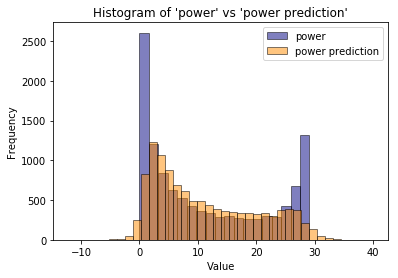

In [37]:
plot_histogram_compare(y_test, y_pred)

#### Scatter compare

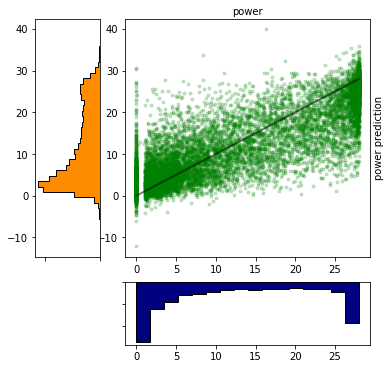

In [38]:
plot_scatter_histogram(y_test, y_pred)

#### Accuracy histogram

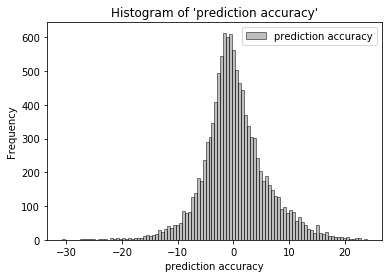

In [39]:
y_accuracy = pd.Series(y_test - y_pred, name='prediction accuracy')

plot_histogram(y_accuracy)

### SVM

In [40]:
model = clone(models['svm'])
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_test), index=y_test.index, name='{} prediction'.format(y_test.name))

get_scores([
    pd.Series([y_train, model.predict(X_train)], name='Training'),
    pd.Series([y_test, y_pred], name='Testing'),
])

,EV,R2,RMSE
Training,0.724522,0.723844,5.437252
Testing,0.701611,0.699831,5.688070


#### Histogram compare

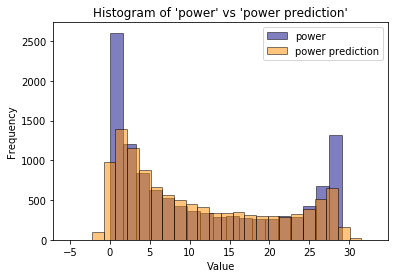

In [41]:
plot_histogram_compare(y_test, y_pred)

#### Scatter compare

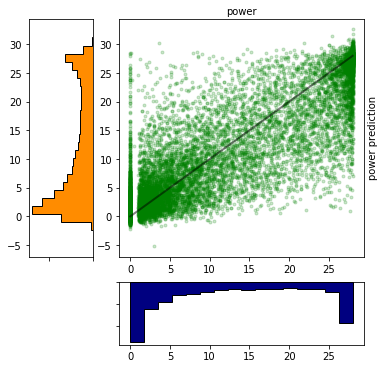

In [42]:
plot_scatter_histogram(y_test, y_pred)

#### Accuracy histogram

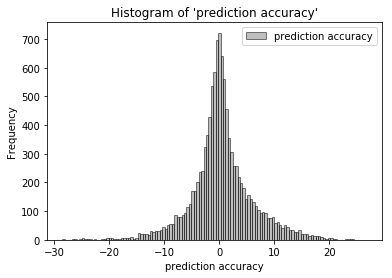

In [43]:
y_accuracy = pd.Series(y_test - y_pred, name='prediction accuracy')

plot_histogram(y_accuracy)